<a href="https://colab.research.google.com/github/cidivan/cidivan/blob/circleci-project-setup/pyfoma_fonologia_computacional_pratica01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Prática no computador - Fonologia computacional
> Faremos um exemplo prático para você conhecer melhor como se faz uma modelagem simbólica em um computador. Construiremos um transdutor que faz a transcrição de grafema para a representação fonética dos sons na fala potiguar.





## Instalação do graphviz
* Programa que gera os grafos de estados finitos

* Diretório do arquivo 

In [ ]:
!apt install graphviz

## Importando a biblioteca PyFoma
**Python Finite-State Toolkit**

> PyFoma is a an open source (Apache) package for finite-state automaton and transducer modeling and learning. It is implemented entirely in Python with no external dependencies.
[Acesse o pyfoma](https://github.com/mhulden/pyfoma)

In [ ]:
# importando a biblioteca pyfoma
from pyfoma import FST

## Testando a biblioteca PyFoma

In [ ]:
texto = ['clever','never','sear']

In [ ]:
myfst = FST.re("(cl|n|s)?e(ve|a)r")

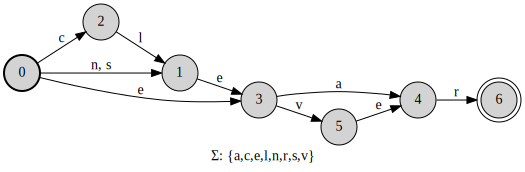

In [ ]:
myfst.view()

In [ ]:
for x in texto:
  print(list(myfst.generate(x)))



---



## Informações importantes
**Operadores**
* \+ significa uma ou mais vezes;

* \* significa zero ou mais vezes;
* ? significa zero ou uma vez;
* \. significa qualquer símbolo numa string
* espaço em branco = concatenação
* \$ O compilador interpreta qualquer string começando com um símbolo $ como sendo um FSM pré-definido.
**funções**
* fst.alphabet() # retorna o alfabeto da fst;
* FST.re() # cria uma FST a parti de uma expressão regular;
* fst.view() gera um grafo da FST;

## Fenômeno da nasalidade na fala portiguar

In [ ]:
nasal = FST.re("[mn]")
nasalization = FST.re("$^rewrite(a:'ã'|e:'ẽ'|i:'ĩ'|o:'õ'|u:'ũ'/_$nasal)", {'nasal':nasal})

### testando a função

In [ ]:
nasalization.view()

In [ ]:
list(nasalization.generate("ẽ"))

['ẽ']

## Nasalização das vogais no português

In [ ]:
myfst = FST.re("(cat|dog|mouse)s?")
myfst.view()

In [ ]:
FST.re("(dog|cat|rat):(animal|mammal)").view()


In [ ]:
FST.re("cat:chat").view()

In [ ]:
exem = FST.re("(cat):(chat)")

In [ ]:
list(exem.generate('cat'))

['chat']

# Transdutor

## Formação da sílaba no português

In [12]:
# Define the vowels
vowel = FST.re("([aeiou])")
# Define the consoants
consoant = FST.re("([a-z]-[aeiou])")
# Define the sillyble
syllable = FST.re("($consoant? $vowel [nmlrsz]?)+" , {'vowel':vowel, 'consoant':consoant})

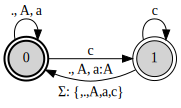

In [ ]:
# Rewrite rules
myrule = FST.re("$^rewrite(a:A /c_)").view()

In [ ]:
list(myrule.generate("ca"))

AttributeError: ignored